Model Training

In [20]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

Import the CSV Data as Pandas DataFrame

In [21]:
df = pd.read_csv('data/heart_failure.csv')

Reading top 5

In [22]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Preparing X and Y variables

In [23]:
X = df.drop('DEATH_EVENT', axis=1)

In [24]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [25]:
y = df['DEATH_EVENT']

In [26]:
# Scaling
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()
x=sc.fit_transform(X)

In [28]:
x

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [31]:
# Creating Function
def predict(model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    trainac=model.score(x_train,y_train)
    testac=model.score(x_test,y_test)
    
    print(f"Triaing Accuracy {trainac}\nTesting Accuracy {testac}")

In [32]:
# KNN
model_knn=KNeighborsClassifier(n_neighbors=6)
model_knn.fit(x_train,y_train)
ypred_knn=model_knn.predict(x_test)
trainac_knn=model_knn.score(x_train,y_train)
testac_knn=model_knn.score(x_test,y_test)
print(f"Triaing Accuracy {trainac_knn}\nTesting Accuracy {testac_knn}")  

Triaing Accuracy 0.7949790794979079
Testing Accuracy 0.6833333333333333


In [33]:
trainac=[]
testac=[]

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    ypred=knn.predict(x_test)
    
    trainac.append(knn.score(x_train,y_train))
    testac.append(knn.score(x_test,y_test))

In [34]:
import seaborn as sns


Text(0, 0.5, 'Accuracy')

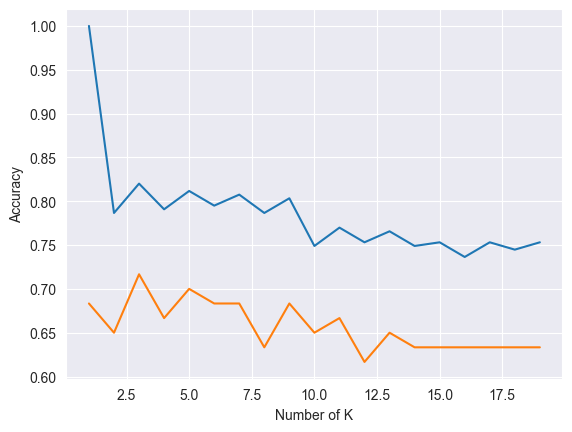

In [35]:
sns.set_style(style='darkgrid')

plt.plot(range(1,20), trainac)
plt.plot(range(1,20),testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')

In [36]:
# Random Forest Classifier

model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
ypred_rf=model_rf.predict(x_test)
trainac_rf=model_rf.score(x_train,y_train)
testac_rf=model_rf.score(x_test,y_test)
print(f"Triaing Accuracy {trainac_rf}\nTesting Accuracy {testac_rf}") 

Triaing Accuracy 1.0
Testing Accuracy 0.7166666666666667


In [37]:
from sklearn.svm import SVC

In [38]:
model_SVC_rbf=SVC(kernel='rbf')
model_SVC_rbf.fit(x_train,y_train)
ypred_SVC_rbf=model_SVC_rbf.predict(x_test)
trainac_SVC_rbf=model_SVC_rbf.score(x_train,y_train)
testac_SVC_rbf=model_SVC_rbf.score(x_test,y_test)
print(f"Triaing Accuracy {trainac_SVC_rbf}\nTesting Accuracy {testac_SVC_rbf}") 

Triaing Accuracy 0.9288702928870293
Testing Accuracy 0.75


In [39]:
model_SVC_poly=SVC(kernel='poly')
model_SVC_poly.fit(x_train,y_train)
ypred_SVC_poly=model_SVC_poly.predict(x_test)
trainac_SVC_poly=model_SVC_poly.score(x_train,y_train)
testac_SVC_poly=model_SVC_poly.score(x_test,y_test)
print(f"Triaing Accuracy {trainac_SVC_poly}\nTesting Accuracy {testac_SVC_poly}") 

Triaing Accuracy 0.9037656903765691
Testing Accuracy 0.6833333333333333


In [40]:
model_SVC_linear=SVC(kernel='linear')
model_SVC_linear.fit(x_train,y_train)
ypred_SVC_linear=model_SVC_linear.predict(x_test)
trainac_SVC_linear=model_SVC_linear.score(x_train,y_train)
testac_SVC_linear=model_SVC_linear.score(x_test,y_test)
print(f"Triaing Accuracy {trainac_SVC_linear}\nTesting Accuracy {testac_SVC_linear}") 

Triaing Accuracy 0.8744769874476988
Testing Accuracy 0.8


In [41]:
model_SVC_sigmoid=SVC(kernel='sigmoid')
model_SVC_sigmoid.fit(x_train,y_train)
ypred_SVC_sigmoid=model_SVC_sigmoid.predict(x_test)
trainac_SVC_sigmoid=model_SVC_sigmoid.score(x_train,y_train)
testac_SVC_sigmoid=model_SVC_sigmoid.score(x_test,y_test)
print(f"Triaing Accuracy {trainac_SVC_sigmoid}\nTesting Accuracy {testac_SVC_sigmoid}") 

Triaing Accuracy 0.8075313807531381
Testing Accuracy 0.8


In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
model_LR=LogisticRegression()
model_LR.fit(x_train,y_train)
ypred_LR=model_SVC_sigmoid.predict(x_test)
trainac_LR=model_SVC_sigmoid.score(x_train,y_train)
testac_LR=model_SVC_sigmoid.score(x_test,y_test)
print(f"Triaing Accuracy {trainac_LR}\nTesting Accuracy {testac_LR}")

Triaing Accuracy 0.8075313807531381
Testing Accuracy 0.8


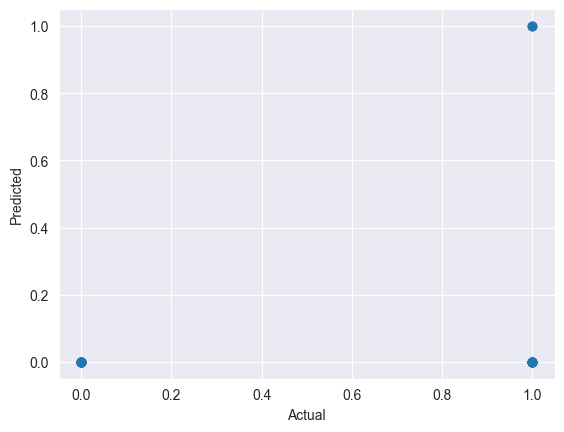

In [49]:
plt.scatter(y_test,ypred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

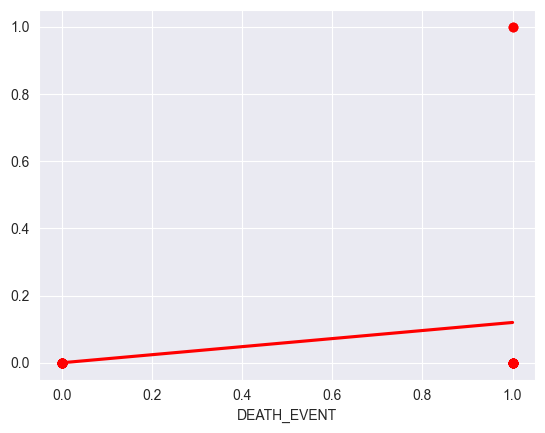

In [50]:
sns.regplot(x=y_test,y=ypred,ci=None,color ='red');


In [51]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':ypred,'Difference':y_test-ypred})
pred_df

,Actual Value,Predicted Value,Difference
281,0,0,0
265,0,0,0
164,1,0,1
9,1,1,0
77,0,0,0
278,0,0,0
93,1,0,1
109,0,0,0
5,1,1,0
173,0,0,0
